In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("./lucas_pre.csv")

In [20]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['Depth', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0']
Numerical Columns: ['pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'Elev', 'Coarse', 'Clay', 'Sand', 'Silt']


In [14]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Al               86.778340
Ox_Fe               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
dtype: float64


In [15]:
def drop_missing_columns(df, threshold=0.8):
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


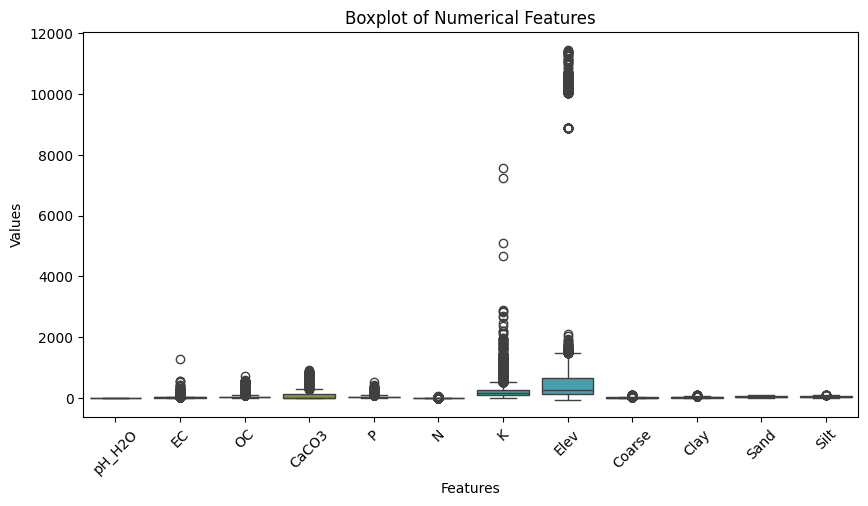

In [16]:
def plot_outliers(data):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data)
    plt.xticks(rotation=45)
    plt.title("Boxplot of Numerical Features")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.show()


plot_outliers(df)

In [18]:
df.count()

Depth       18984
pH_H2O      18983
EC          18975
OC          18949
CaCO3       11212
P           13981
N           18969
K           18944
NUTS_1      18984
NUTS_2      18984
NUTS_3      18984
Elev        18984
LC          18984
LU          18984
LC0_Desc    18984
LC1_Desc    18984
LU1_Desc    18984
Coarse      16275
Clay        16728
Sand        16728
Silt        16728
USDA        16728
ISSS        16728
NUTS_0      18984
dtype: int64

In [ ]:
if "pH_H2O" in numerical_cols:
    numerical_cols.remove("pH_H2O")

In [21]:
def handle_outliers(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Option 1: Cap the outliers at the boundaries
        df_clean[column] = df_clean[column].clip(lower_bound, upper_bound)

        # Option 2 (alternative): Replace outliers with NaN for later imputation
        # outlier_mask = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)
        # df_clean.loc[outlier_mask, column] = np.nan

    return df_clean


# Apply outlier handling to numerical columns
df_cleaned = handle_outliers(df, numerical_cols)
df_cleaned.count()


Depth       18984
pH_H2O      18983
EC          18975
OC          18949
CaCO3       11212
P           13981
N           18969
K           18944
NUTS_1      18984
NUTS_2      18984
NUTS_3      18984
Elev        18984
LC          18984
LU          18984
LC0_Desc    18984
LC1_Desc    18984
LU1_Desc    18984
Coarse      16275
Clay        16728
Sand        16728
Silt        16728
USDA        16728
ISSS        16728
NUTS_0      18984
dtype: int64

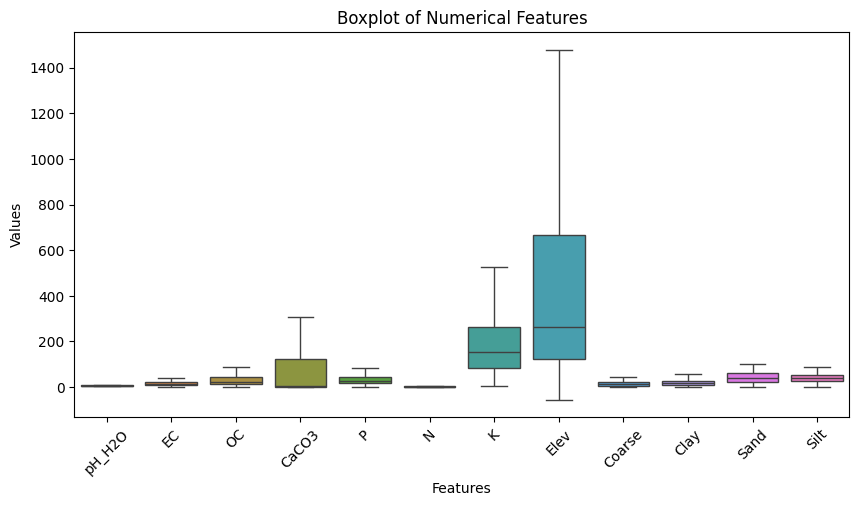

In [22]:
plot_outliers(df_cleaned)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Encoding Depth...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC0_Desc...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...


/var/folders/8t/l4w3q1y96ys6mn_9yk43kpfr0000gn/T/ipykernel_63799/4206471262.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_correlation.values, y=target_correlation.index, palette="coolwarm")


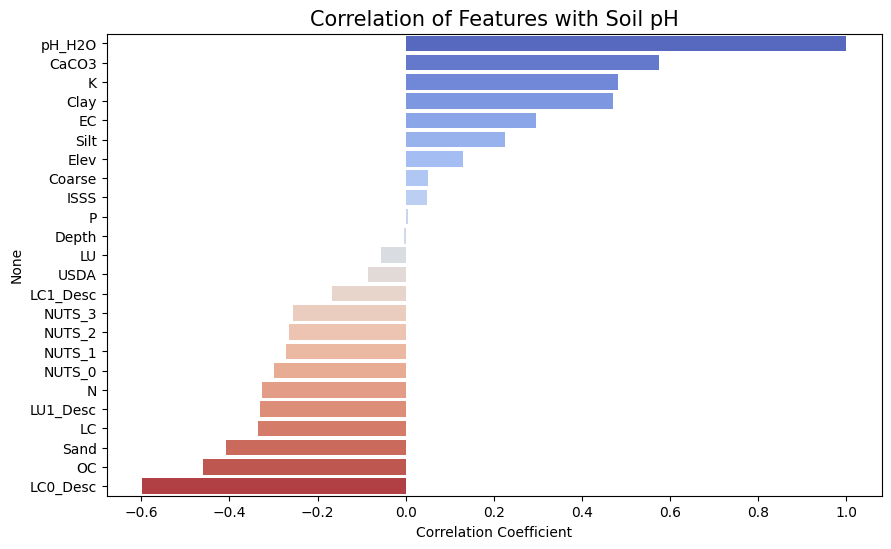

In [24]:
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df_encoded = label_encode(df_cleaned)

correlation_matrix = df_encoded.corr()

# Get the correlation of each feature with soil pH
target_correlation = correlation_matrix["pH_H2O"].sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of the correlations
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette="coolwarm")

# Set the title and labels
plt.title("Correlation of Features with Soil pH", size=15)
plt.xlabel("Correlation Coefficient")

# Display the bar plot
plt.show()


In [ ]:
X = df_cleaned.drop("pH_H2O", axis=1)
y = df_cleaned["pH_H2O"]

# Step 8: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 9: Create preprocessing pipeline
# For numerical columns: impute missing values and scale
numerical_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer(n_neighbors=5)),  # KNN imputation often works better than mean/median for soil data
        ("scaler", StandardScaler()),
    ]
)

# For categorical columns: impute missing values and one-hot encode
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[("num", numerical_transformer, numerical_cols), ("cat", categorical_transformer, categorical_cols)]
)

# Step 10: Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [20]:
from keras.api.models import Sequential
from keras.api.layers import Dense, Input, Dropout, BatchNormalization
from keras.api.optimizers import Adam, RMSprop
from keras.api.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
print(f"\nProcessed training data shape: {X_train_processed.shape}")


# Step 11: Build and train the neural network model
def build_model(input_dim):
    model = Sequential(
        [
            # Input layer
            Dense(128, activation="relu", input_dim=input_dim),
            BatchNormalization(),
            Dropout(0.3),
            # Hidden layers
            Dense(64, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Dense(32, activation="relu"),
            BatchNormalization(),
            Dropout(0.1),
            # Output layer
            Dense(1, activation="linear"),  # Linear activation for regression
        ]
    )

    model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error", metrics=["mae"])
    return model


Processed training data shape: (15187, 1620)


In [ ]:
# Get input dimensions from processed data
input_dim = X_train_processed.shape[1]

# Initialize model
model = build_model(input_dim)
print("\nModel summary:")
model.summary()

# Step 12: Set up callbacks for training
callbacks = [
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
    ModelCheckpoint("best_soil_ph_model.h5", save_best_only=True, monitor="val_loss"),
]

# Step 13: Train the model
history = model.fit(
    X_train_processed, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=callbacks, verbose=1
)


Model summary:


/Users/rafi/.local/share/mise/installs/python/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-22 01:14:09.539742: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-22 01:14:09.539921: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-22 01:14:09.539936: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1742616849.540608  859507 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1742616849.540707  859507 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/de

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       207,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,753 (854.50 KB)

 Trainable params: 218,305 (852.75 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/200


2025-03-22 01:14:10.659942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29.9649 - mae: 5.1959

380/380 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 29.9350 - mae: 5.1922 - val_loss: 1.0018 - val_mae: 0.8357
Epoch 2/200
378/380 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7065 - mae: 1.0288

380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 1.7057 - mae: 1.0286 - val_loss: 0.5503 - val_mae: 0.5846
Epoch 3/200
379/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.3333 - mae: 0.9086

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 1.3331 - mae: 0.9085 - val_loss: 0.4718 - val_mae: 0.5383
Epoch 4/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 1.1861 - mae: 0.8575 - val_loss: 0.4736 - val_mae: 0.5415
Epoch 5/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.0606 - mae: 0.8126

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 1.0605 - mae: 0.8125 - val_loss: 0.4268 - val_mae: 0.5100
Epoch 6/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.9954 - mae: 0.7839 - val_loss: 0.4329 - val_mae: 0.5155
Epoch 7/200
378/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9354 - mae: 0.7638

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.9353 - mae: 0.7638 - val_loss: 0.4167 - val_mae: 0.5030
Epoch 8/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.8976 - mae: 0.7469 - val_loss: 0.4206 - val_mae: 0.5070
Epoch 9/200
379/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8561 - mae: 0.7312

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.8561 - mae: 0.7312 - val_loss: 0.4150 - val_mae: 0.5011
Epoch 10/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8302 - mae: 0.7151

380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.8301 - mae: 0.7151 - val_loss: 0.4090 - val_mae: 0.4988
Epoch 11/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.8136 - mae: 0.7099 - val_loss: 0.4152 - val_mae: 0.5064
Epoch 12/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.7951 - mae: 0.7094 - val_loss: 0.4111 - val_mae: 0.5021
Epoch 13/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.7842 - mae: 0.7007 - val_loss: 0.4100 - val_mae: 0.5007
Epoch 14/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7479 - mae: 0.6876

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7479 - mae: 0.6876 - val_loss: 0.4060 - val_mae: 0.4984
Epoch 15/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.7632 - mae: 0.6884 - val_loss: 0.4070 - val_mae: 0.5019
Epoch 16/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.7455 - mae: 0.6854 - val_loss: 0.4125 - val_mae: 0.5024
Epoch 17/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7403 - mae: 0.6800 - val_loss: 0.4240 - val_mae: 0.5111
Epoch 18/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7330 - mae: 0.6771 - val_loss: 0.4071 - val_mae: 0.4992
Epoch 19/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7301 - mae: 0.6774 - val_loss: 0.4259 - val_mae: 0.5127
Epoch 20/200
379/380 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6997 - mae: 0.6657

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6997 - mae: 0.6657 - val_loss: 0.4053 - val_mae: 0.4967
Epoch 21/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.7216 - mae: 0.6783 - val_loss: 0.4083 - val_mae: 0.4995
Epoch 22/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7138 - mae: 0.6671 - val_loss: 0.4125 - val_mae: 0.5053
Epoch 23/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 0.7135 - mae: 0.6691 - val_loss: 0.4128 - val_mae: 0.5028
Epoch 24/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.7100 - mae: 0.6699 - val_loss: 0.4195 - val_mae: 0.5114
Epoch 25/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7042 - mae: 0.6632 - val_loss: 0.4130 - val_mae: 0.5011
Epoch 26/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7087 - mae: 0.6636 - val_loss: 0.4070 - val_mae: 0.4999
Epoch 27/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7126 - mae: 0.6683 - val_loss: 0.4057 - val_mae: 0.4980
Epoch 28/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 

380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.6978 - mae: 0.6635 - val_loss: 0.4042 - val_mae: 0.4975
Epoch 31/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.6715 - mae: 0.6444 - val_loss: 0.4084 - val_mae: 0.5012
Epoch 32/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.7072 - mae: 0.6739 - val_loss: 0.4092 - val_mae: 0.4991
Epoch 33/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.6980 - mae: 0.6640 - val_loss: 0.4070 - val_mae: 0.5002
Epoch 34/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6969 - mae: 0.6578 - val_loss: 0.4074 - val_mae: 0.4983
Epoch 35/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6732 - mae: 0.6533 - val_loss: 0.4111 - val_mae: 0.4991
Epoch 36/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.6905 - mae: 0.6610 - val_loss: 0.4127 - val_mae: 0.5066
Epoch 37/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.6749 - mae: 0.6519 - val_loss: 0.4130 - val_mae: 0.5046
Epoch 38/200
380/380 ━━━━━━━━━━━━━━━━━━━━ 8s

In [23]:
# Step 15: Make predictions and evaluate
y_pred = model.predict(X_test_processed).flatten()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


ValueError: Input contains NaN.